In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

path = 'C:/Users/YOnSAI/AppData/Local/Microsoft/Windows/Fonts' 
fm.fontManager.addfont(path + '/D2Coding-Ver1.3.2-20180524.ttf')
plt.rcParams['font.family'] = 'D2Coding'

In [3]:
df = pd.read_csv('data/20230425_유튜브랭킹.csv')
df.head(3)

,랭크,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158


- 구독자수 Top 20 - barh 차트로

In [13]:
sub = df.head(20)
sub.head(5)

,랭크,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158
3,4,음악/댄스/가수,SMTOWN,31600000,26794810000,4110
4,5,음악/댄스/가수,JYP Entertainment,26800000,19275070000,1668


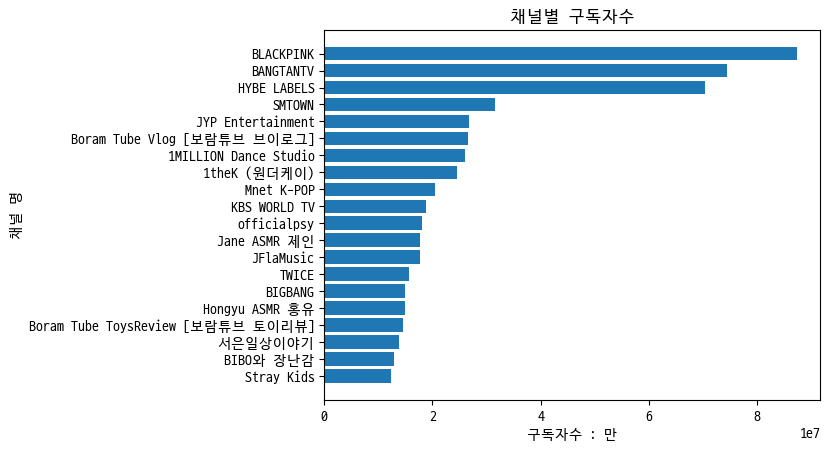

In [16]:
sub.sort_index(ascending=False, inplace=True)
plt.barh(sub.채널, sub.구독자수)
plt.title('구독자수 ')
plt.xlabel('구독자수 : 만'), plt.ylabel('채널 명')
plt.show()

In [82]:
sub.sort_index(ascending=False, inplace=True)
# plt.figure(figsize=(12, 8))
# plt.barh(sub.채널, sub.구독자수)
sns.barplot(y=sub.채널, x=sub.구독자수)
plt.title('채널별 구독자수')
plt.xlabel('구독자수 : 만'), plt.ylabel('채널 명')
plt.show()


AttributeError: 'DataFrame' object has no attribute '채널'

- 조회수 : Top 20

In [20]:
df.head()

,랭크,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158
3,4,음악/댄스/가수,SMTOWN,31600000,26794810000,4110
4,5,음악/댄스/가수,JYP Entertainment,26800000,19275070000,1668


In [24]:
sub = df.sort_values('조회수', ascending=False).head(20)
sub.sort_values('조회수', ascending=True, inplace=True)

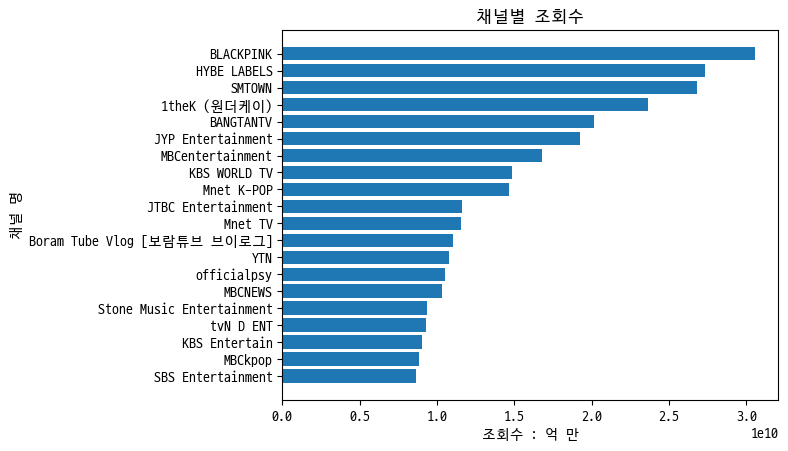

In [26]:

plt.barh(sub.채널, sub.조회수)
plt.title('채널별 조회수')
plt.xlabel('조회수 : 억 만'), plt.ylabel('채널 명')
plt.show()

- 비디오수 Top 20

In [29]:
sub = df.sort_values('비디오', ascending=False).head(20)
sub.sort_values('비디오', ascending=True, inplace=True)

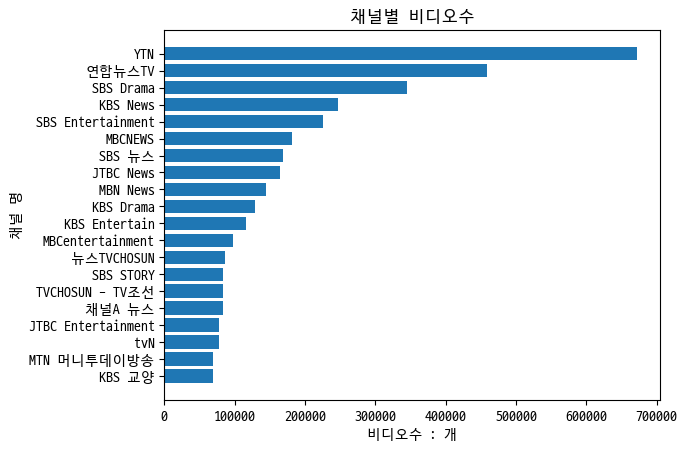

In [30]:
plt.barh(sub.채널, sub.비디오)
plt.title('채널별 비디오수')
plt.xlabel('비디오수 : 개'), plt.ylabel('채널 명')
plt.show()

In [ ]:
sns.barplot(y='채널명', x='비디오', data=sub)

- 카테고리별 채널 수 Top10

In [63]:
df3 = df.카테고리.value_counts().to_frame()
df3.head(10)

,count
카테고리,
미분류,181
음악/댄스/가수,155
키즈/어린이,132
TV/방송,125
음식/요리/레시피,71
BJ/인물/연예인,61
뉴스/정치/사회,59
게임,51
취미/라이프,31


In [31]:
df.head(5)

,랭크,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158
3,4,음악/댄스/가수,SMTOWN,31600000,26794810000,4110
4,5,음악/댄스/가수,JYP Entertainment,26800000,19275070000,1668


In [70]:
sub = df.pivot_table('채널', '카테고리', aggfunc='count')
sub = sub.sort_values('채널', ascending=False).head(10)
# sub.sort_values('채널', ascending=True, inplace=True)

In [67]:
sub

,채널
카테고리,
영화/만화/애니,30
취미/라이프,31
게임,51
뉴스/정치/사회,59
BJ/인물/연예인,61
음식/요리/레시피,71
TV/방송,125
키즈/어린이,132
음악/댄스/가수,155


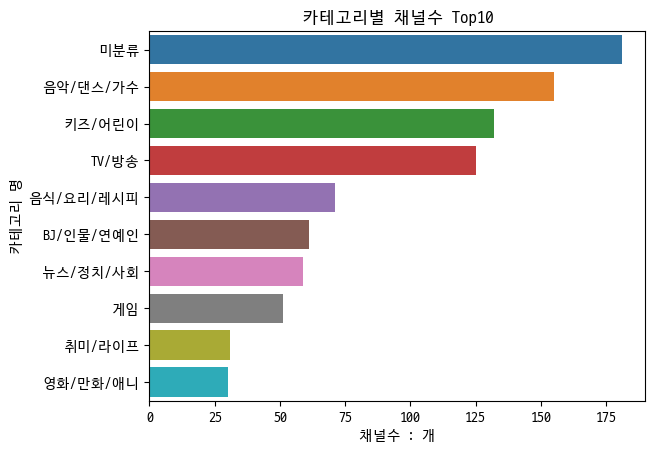

In [71]:
# plt.barh(sub.index, sub.채널)
plt.title('카테고리별 채널수 Top10')
sns.barplot(x='채널', y=sub.index, data=sub)
plt.xlabel('채널수 : 개'), plt.ylabel('카테고리 명')
plt.show()

- 카테고리별 구독자수 Top10

In [53]:
df.head()

,랭크,카테고리,채널,구독자수,조회수,비디오
0,1,음악/댄스/가수,BLACKPINK,87300000,30533500000,507
1,2,음악/댄스/가수,BANGTANTV,74500000,20143000000,2188
2,3,음악/댄스/가수,HYBE LABELS,70300000,27323160000,1158
3,4,음악/댄스/가수,SMTOWN,31600000,26794810000,4110
4,5,음악/댄스/가수,JYP Entertainment,26800000,19275070000,1668


In [75]:
sub = df.pivot_table('구독자수', '카테고리', aggfunc='sum')
sub = sub.sort_values('구독자수', ascending=False).head(10)
# sub.sort_values('구독자수', ascending=True, inplace=True)
sub

,구독자수
카테고리,
음악/댄스/가수,818080000
키즈/어린이,402090000
TV/방송,267760000
미분류,249330000
음식/요리/레시피,215100000
뉴스/정치/사회,102500000
BJ/인물/연예인,102290000
게임,67350000
취미/라이프,49700000


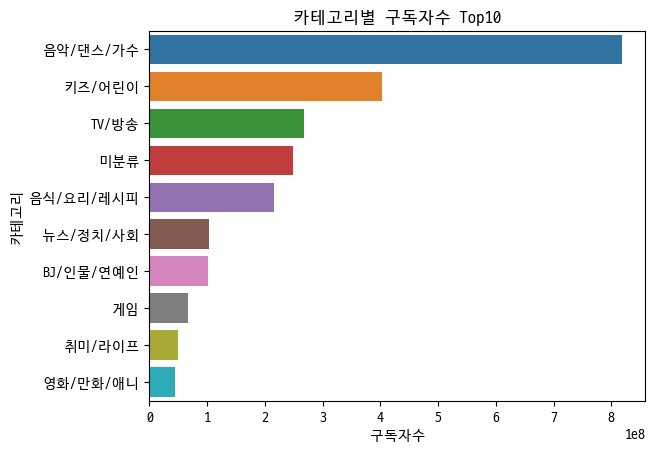

In [79]:
sns.barplot(y=sub.index[:10], x=sub.구독자수.head(10))
plt.title('카테고리별 구독자수 Top10')
plt.show()

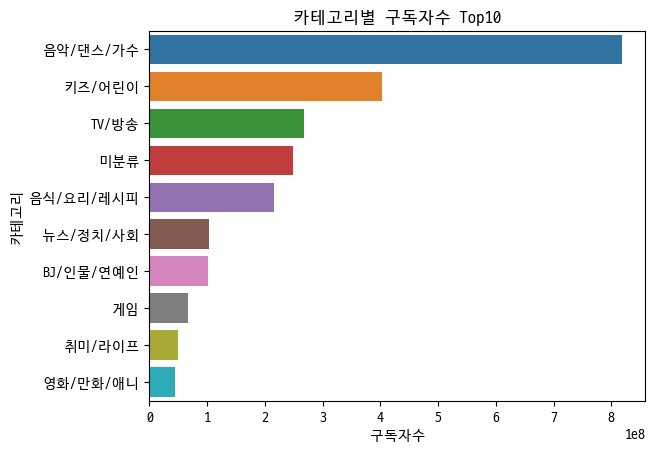

In [78]:
# plt.barh(sub.index, sub.채널)
sns.barplot(x='구독자수', y=sub.index, data=sub)
plt.title('카테고리별 구독자수 Top10')
plt.show()